<center><h1 style="color:whithe;font-size:40px;">SMOTE</h1>  </center>
<center><h1 style="color:whithe;font-size:20px;">Synthetic Minority Oversampling TEchnique</h1>  </center><br>

Source : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [61]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [62]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


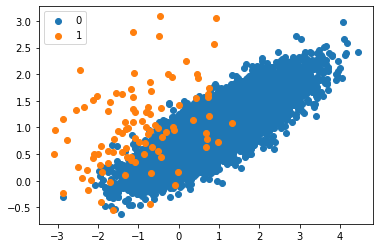

In [63]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [64]:
oversample = SMOTE(sampling_strategy=0.1)
X_one, y_one = oversample.fit_resample(X, y)

In [65]:
new_counter = Counter(y_one)
print(new_counter)

Counter({0: 9900, 1: 990})


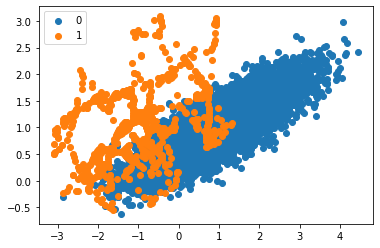

In [66]:
for label, _ in new_counter.items():
    row_ix = where(y_one == label)[0]
    pyplot.scatter(X_one[row_ix, 0], X_one[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [67]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [68]:
steps = [('o', over), ('u', under)]
pipline = Pipeline(steps=steps)

In [69]:
X_pipe, y_pipe = pipline.fit_resample(X, y)

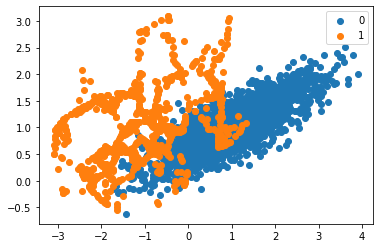

In [70]:
for label, _ in new_counter.items():
    row_ix = where(y_pipe == label)[0]
    pyplot.scatter(X_pipe[row_ix, 0], X_pipe[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [71]:
Counter(y_pipe)

Counter({0: 1980, 1: 990})

In [55]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [72]:
decisionTreeClassifierNormal = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(decisionTreeClassifierNormal, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [73]:
print('mean ROC AUC of the decisionTree is %0.3f' % mean(scores))

mean ROC AUC of the decisionTree is 0.762


In [74]:
decisionTreeClassifierPipe = DecisionTreeClassifier()
stpes = steps.append(('model', decisionTreeClassifierPipe))

In [75]:
pipeline = Pipeline(steps=steps)

In [76]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [77]:
print('mean ROC AUC of the decisionTree is %0.3f' % mean(scores))

mean ROC AUC of the decisionTree is 0.840
